Text Mining

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords',
              'punkt',
              'wordnet',
              'omw-1.4',
              'vader_lexicon'
              ])
from nltk.stem import WordNetLemmatizer
              
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
stop_words = nltk.corpus.stopwords.words('english')

In [ ]:
#Create function to apply all of the data preprocessing steps which we can then use in corpus

def preprocess_text(text):
  tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text) #Tokenize
  cleaned_tokens= [word.lower() for word in tokenized_document if word.lower() not in stop_words] #Remove
  lemmatized_text = [nltk.stem.WordNetLemmatizer().lemmatize(word) for word in cleaned_tokens] #Lemmatizing
  return lemmatized_text

In [ ]:
hotel_reviews = pd.read_csv('tourist_accommodation_reviews.csv', encoding='cp1252')

hotel_reviews.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...


In [ ]:
reviews_kamala_hotels = hotel_reviews[(hotel_reviews["Location"] ==' Kamala' )]

In [ ]:
reviews_kamala_hotels.describe()

,ID,Review Date,Location,Hotel/Restaurant name,Review
count,3162,3162,3162,3162,3162
unique,2932,1070,1,32,2930
top,rn562079885,Reviewed 1 week ago,Kamala,Grill Bill,"With a great view of several beaches, a great ..."
freq,6,51,3162,100,6


In [ ]:
reviews_kamala_hotels['Review_Text']=reviews_kamala_hotels['Review'].apply(preprocess_text)
reviews_kamala_hotels.head()

<ipython-input-7-14d97c846d85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_kamala_hotels['Review_Text']=reviews_kamala_hotels['Review'].apply(preprocess_text)


,ID,Review Date,Location,Hotel/Restaurant name,Review,Review_Text
6138,rn580448653,Reviewed 5 days ago,Kamala,Grill Bill,The best place to eat when you want time out f...,"[best, place, eat, want, time, thai, food, tun..."
6139,rn580335133,Reviewed 5 days ago,Kamala,Grill Bill,Grill Bill is a amazing cozy place with a warm...,"[grill, bill, amazing, cozy, place, warm, atmo..."
6140,rn579799722,Reviewed 1 week ago,Kamala,Grill Bill,After seeing that Grill Bill was the number on...,"[seeing, grill, bill, number, one, resturant, ..."
6141,rn578695769,Reviewed 1 week ago,Kamala,Grill Bill,3 persons ordered Angus Beef steak 800 baht ea...,"[3, person, ordered, angus, beef, steak, 800, ..."
6142,rn577118778,Reviewed 2 weeks ago,Kamala,Grill Bill,"Very fast and friendly service, tasty BBQ, but...","[fast, friendly, service, tasty, bbq, western,..."


Sentimental Analysis

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

In [ ]:
reviews_kamala_hotels['compound'] = [sentiment.polarity_scores(review)['compound'] for review in reviews_kamala_hotels['Review']]
reviews_kamala_hotels['neg'] = [sentiment.polarity_scores(review)['neg'] for review in reviews_kamala_hotels['Review']]
reviews_kamala_hotels['neu'] = [sentiment.polarity_scores(review)['neu'] for review in reviews_kamala_hotels['Review']]
reviews_kamala_hotels['pos'] = [sentiment.polarity_scores(review)['pos'] for review in reviews_kamala_hotels['Review']]

<ipython-input-9-d961673143b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_kamala_hotels['compound'] = [sentiment.polarity_scores(review)['compound'] for review in reviews_kamala_hotels['Review']]
<ipython-input-9-d961673143b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_kamala_hotels['neg'] = [sentiment.polarity_scores(review)['neg'] for review in reviews_kamala_hotels['Review']]
<ipython-input-9-d961673143b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [ ]:
reviews_kamala_hotels.describe()

,compound,neg,neu,pos
count,3162.000000,3162.000000,3162.000000,3162.000000
mean,0.662205,0.027501,0.735473,0.237031
std,0.425259,0.051363,0.124113,0.133700
min,-0.959000,0.000000,0.244000,0.000000
25%,0.610800,0.000000,0.658000,0.139000
50%,0.843900,0.000000,0.740000,0.230000
75%,0.928600,0.043000,0.823000,0.325000
max,0.990400,0.427000,1.000000,0.756000


In [ ]:
reviews_kamala_hotels[['compound','neg','neu','pos']].describe()

,compound,neg,neu,pos
count,3162.000000,3162.000000,3162.000000,3162.000000
mean,0.662205,0.027501,0.735473,0.237031
std,0.425259,0.051363,0.124113,0.133700
min,-0.959000,0.000000,0.244000,0.000000
25%,0.610800,0.000000,0.658000,0.139000
50%,0.843900,0.000000,0.740000,0.230000
75%,0.928600,0.043000,0.823000,0.325000
max,0.990400,0.427000,1.000000,0.756000


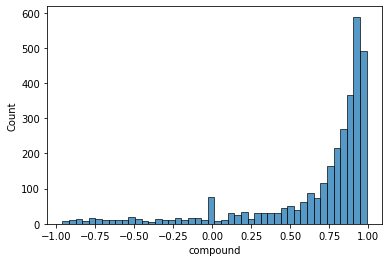

In [ ]:
sns.histplot(reviews_kamala_hotels['compound'])

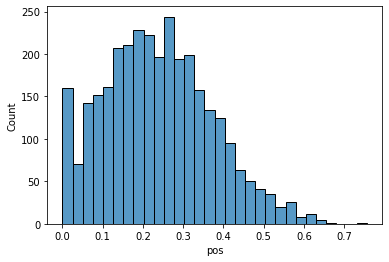

In [ ]:
sns.histplot(reviews_kamala_hotels['pos'])

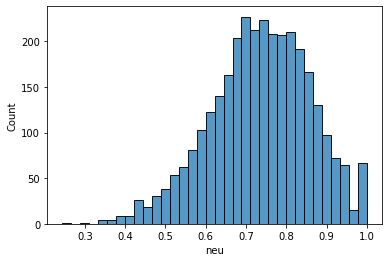

In [ ]:
sns.histplot(reviews_kamala_hotels['neu'])

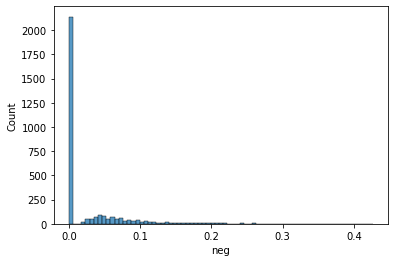

In [ ]:
sns.histplot(reviews_kamala_hotels['neg'])

In [ ]:
#how many negative reviews we have per hotel

(reviews_kamala_hotels['compound']<=0).groupby(reviews_kamala_hotels['Hotel/Restaurant name']).sum()

Hotel/Restaurant name
Baan Mai                                                          7
Baan Rim Pa Kalim                                                 4
Bellini                                                          14
Bianconero da Tuveri Restaurant & Pizzeria                        6
Blue Manao                                                       10
Bush Garden Kamala<U+200B>                                        5
Cafe del Mar Phuket                                              20
Danny's Place Kamala                                             12
Grill Bill                                                        5
H.C. Andersen - Family Restaurant                                16
HQ Beach Lounge                                                  12
Heaven                                                            3
Hey Ha Bar & Restaurant                                           6
Kaab Gluay                                                       15
Karon Seafood             

In [ ]:
#percentage of total negative reviews

percent_negative = pd.DataFrame((reviews_kamala_hotels['compound']<=0).groupby(reviews_kamala_hotels['Hotel/Restaurant name']).sum()
                                /reviews_kamala_hotels['Hotel/Restaurant name'].groupby(reviews_kamala_hotels['Hotel/Restaurant name']).count()*100,
                              columns=['% negative reviews']).sort_values(by='% negative reviews')
percent_negative

,% negative reviews
Hotel/Restaurant name,
Sweet Dream Restaurant,2.000000
Heaven,3.157895
Baan Rim Pa Kalim,4.000000
"Vanilla Sky Bar & Gastro Pub - Cape Sienna - Phuket, Thailand",4.040404
Grill Bill,5.000000
Bush Garden Kamala<U+200B>,5.050505
Bianconero da Tuveri Restaurant & Pizzeria,6.122449
Hey Ha Bar & Restaurant,6.315789
Baan Mai,7.000000


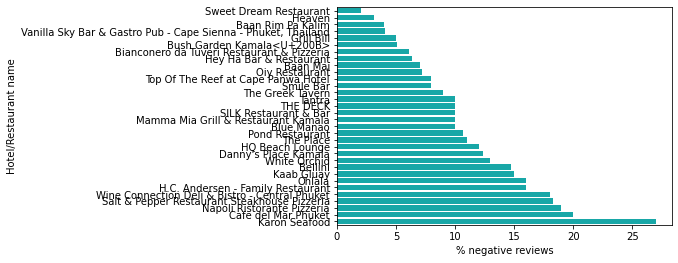

In [ ]:
sns.barplot(data=percent_negative,x='% negative reviews',y=percent_negative.index,color='c')

In [ ]:
reviews_positive_subset = reviews_kamala_hotels.loc[(reviews_kamala_hotels['Hotel/Restaurant name']=='Karon Seafood')
                                  &(reviews_kamala_hotels['compound']>0),:]

reviews_negative_subset = reviews_kamala_hotels.loc[(reviews_kamala_hotels['Hotel/Restaurant name']=='Karon Seafood')
                                  & (reviews_kamala_hotels['compound']<=0),:]

reviews_negative_subset.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,Review_Text,compound,neg,neu,pos
52380,rn580161964,Reviewed 6 days ago,Kamala,Karon Seafood,Strolling through Karon we saw this restaurant...,"[strolling, karon, saw, restaurant, first, res...",-0.6705,0.168,0.771,0.062
52383,rn576708146,Reviewed 2 weeks ago,Kamala,Karon Seafood,Popped in here as it was close to Centara Karo...,"[popped, close, centara, karon, two, young, ki...",-0.2944,0.070,0.885,0.045
52387,rn570485793,"Reviewed April 2, 2018",Kamala,Karon Seafood,We went in here for a meal as the menu was var...,"[went, meal, menu, varied, place, busy, staff,...",0.0000,0.000,1.000,0.000
52391,rn554677528,"Reviewed January 18, 2018",Kamala,Karon Seafood,Our family visited Karon Seafood after many re...,"[family, visited, karon, seafood, many, restau...",-0.7069,0.311,0.689,0.000
52392,rn554405472,"Reviewed January 17, 2018",Kamala,Karon Seafood,This place doesn't even deserve 1 star! We wen...,"[place, even, deserve, 1, star, went, group, 4...",0.0000,0.000,1.000,0.000


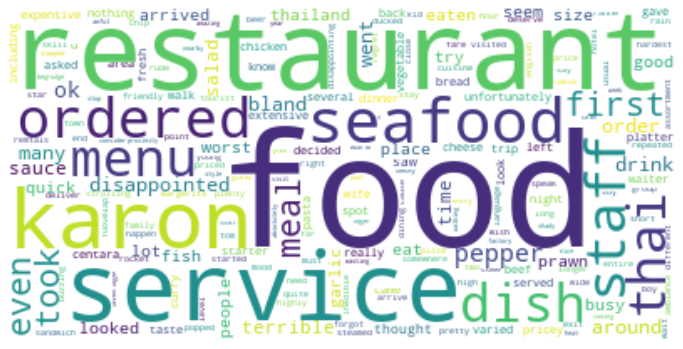

In [ ]:
neg_tokens =[word for review in reviews_negative_subset['Review_Text'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(neg_tokens))

plt.figure(figsize=(12,12))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

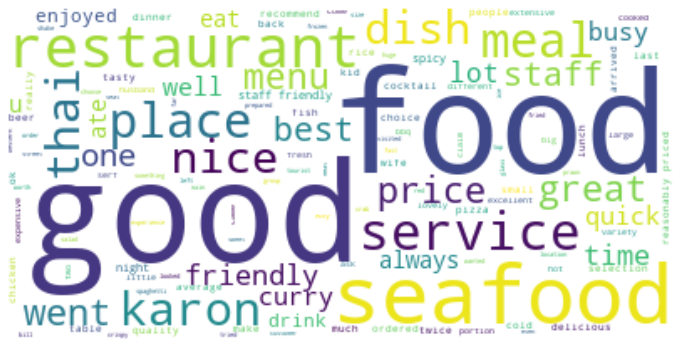

In [ ]:
#wordcloud of words from positive reviews by product

pos_tokens = [word for review in reviews_positive_subset['Review_Text'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(pos_tokens))

#display the generated image:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#use the nltk FreqDist and then Tabulate

from  nltk.probability import FreqDist

pos_freqdist =  FreqDist(pos_tokens)
pos_freqdist.tabulate(10)

      food       good    seafood restaurant      staff    service   friendly      place       meal       thai 
        40         39         27         24         20         19         19         16         16         15 


In [ ]:
#use the nltk FreqDist and then Tabulate

from  nltk.probability import FreqDist

neg_freqdist =  FreqDist(neg_tokens)
neg_freqdist.tabulate(10)

      food restaurant    service      karon    seafood      staff    ordered       menu       dish       thai 
        17         15         11          9          9          7          7          6          6          6 


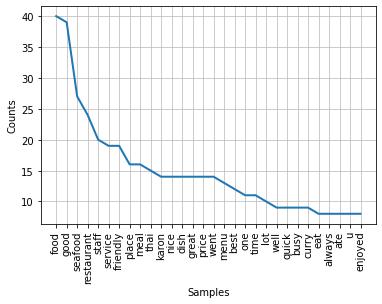

In [ ]:
pos_freqdist.plot(30)

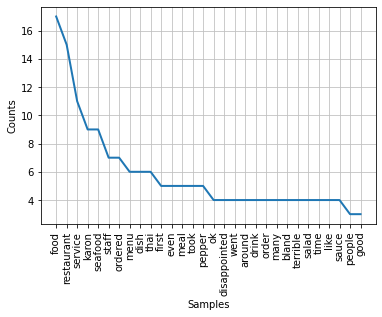

In [ ]:
neg_freqdist.plot(30)